In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Parámetros de la simulación
num_particulas = 160
num_pasos = 100
dt = 1.0
num_simulaciones = 1
# Tamaño de la caja (10 veces más grande que las partículas)
tamano_caja = 125.0

# Probabilidad de ir a la derecha es dos veces mayor que ir a la izquierda
prob_izquierda = 2 / 3

# Crear una matriz para almacenar los MSD de cada simulación en la dirección x e y
msd_simulaciones = np.zeros((num_simulaciones, num_pasos + 1, 2))

# Crear listas para almacenar los resultados de cada simulación en ambas direcciones
distribucion_pasos = []
distribucion_angulos = []
trayectorias = []

In [16]:
for sim in range(num_simulaciones):
    # Creación de un arreglo para almacenar las posiciones de las partículas
    posiciones = np.zeros((num_particulas, num_pasos + 1, 2))
    
    # Inicialización de las posiciones dentro de la caja
    posiciones[:, 0] = np.random.uniform(-tamano_caja / 2, tamano_caja / 2, size=(num_particulas, 2))
    
    # Simulación del movimiento browniano con colisiones en la caja
    for i in range(num_pasos):
        # Generación de pasos aleatorios en ambas direcciones (x e y)
        random_steps = np.random.normal(0, np.sqrt(dt), size=(num_particulas, 2))
        
        # Generación de un ángulo aleatorio para cada partícula
        angulos = np.random.choice([-180, 0], size=num_particulas, p=[prob_izquierda, 1-prob_izquierda])
        distribucion_angulos.append(angulos)
        
        # Cálculo de las direcciones en ambas direcciones
        direcciones = np.column_stack((np.cos(np.radians(angulos)), np.sin(np.radians(angulos))))
        
        # Actualización de las posiciones
        posiciones[:, i+1] = posiciones[:, i] + random_steps * direcciones
        
        # Manejo de colisiones con las paredes de la caja
        posiciones[:, i+1] = np.maximum(np.minimum(posiciones[:, i+1], tamano_caja / 2), -tamano_caja / 2)

    # Cálculo del Mean Square Displacement (MSD) para esta simulación en ambas direcciones
    msd_simulaciones[sim, :, 0] = np.mean((posiciones[:, :, 0] - posiciones[:, 0, 0][:, np.newaxis])**2, axis=0)
    msd_simulaciones[sim, :, 1] = np.mean((posiciones[:, :, 1] - posiciones[:, 0, 1][:, np.newaxis])**2, axis=0)

    # Cálculo de la distribución de pasos en ambas direcciones para esta simulación
    distribucion_pasos.append(np.sqrt(np.sum((posiciones[:, 1:] - posiciones[:, :-1])**2, axis=(1, 2))))
    
    # Almacenar las trayectorias en ambas direcciones para esta simulación
    trayectorias.append(posiciones)


In [17]:
# Cálculo del MSD promedio en ambas direcciones
msd_promedio = np.mean(msd_simulaciones, axis=0)

# Cálculo del coeficiente de difusión promedio en ambas direcciones
epsilon = 1e-10  # Pequeña cantidad para evitar la división por cero
coeficiente_difusion_x = msd_promedio[:, 0] / (2 * np.arange(num_pasos + 1) * dt + epsilon)
coeficiente_difusion_y = msd_promedio[:, 1] / (2 * np.arange(num_pasos + 1) * dt + epsilon)

# Restablecer el tamaño de la figura
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

Text(0, 0.5, 'Densidad')

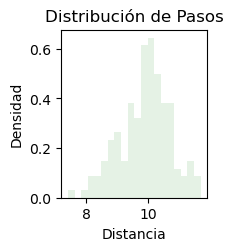

In [18]:
plt.subplot(231)
for distribucion_pasos in distribucion_pasos:
    plt.hist(distribucion_pasos, bins=20, density=True, alpha=0.1, color='g')
plt.title('Distribución de Pasos')
plt.xlabel('Distancia')
plt.ylabel('Densidad')

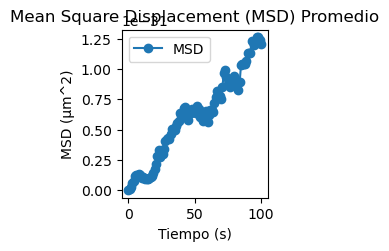

In [19]:
plt.subplot(232)
plt.plot(np.arange(num_pasos + 1) * dt, msd_promedio[:, 1], marker='o', linestyle='-', label='MSD')
plt.title('Mean Square Displacement (MSD) Promedio')
plt.xlabel('Tiempo (s)')
plt.ylabel('MSD (µm^2)')
plt.legend()

Text(0, 0.5, 'Densidad')

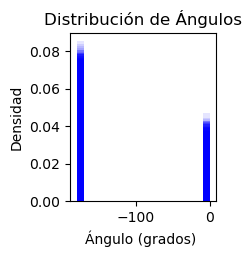

In [20]:
plt.subplot(235)
for distribucion_angulos in distribucion_angulos:
    plt.hist(distribucion_angulos, bins=20, density=True, alpha=0.1, color='b')
plt.title('Distribución de Ángulos')
plt.xlabel('Ángulo (grados) ')
plt.ylabel('Densidad')

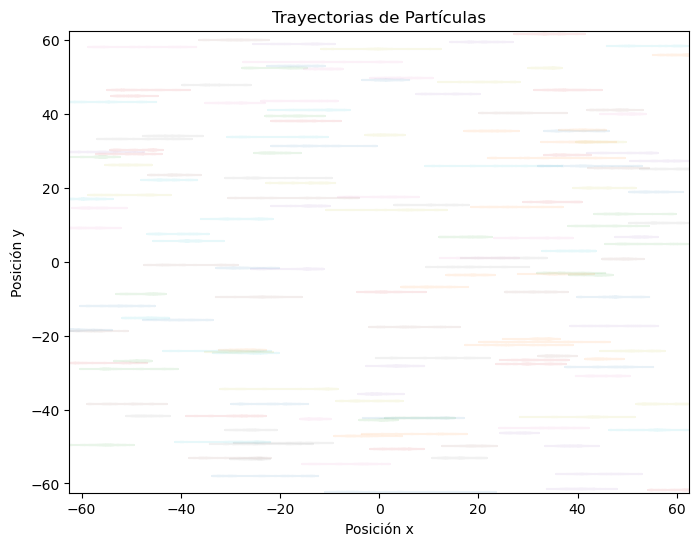

In [21]:
# Grafica trayectorias de partículas
plt.figure(figsize=(8, 6))
for trayectorias in trayectorias:
    for i in range(num_particulas):
        plt.plot(trayectorias[i, :, 0], trayectorias[i, :, 1], alpha=0.1)
plt.title('Trayectorias de Partículas')
plt.xlim(-tamano_caja / 2, tamano_caja / 2)
plt.ylim(-tamano_caja / 2, tamano_caja / 2)
plt.xlabel('Posición x')
plt.ylabel('Posición y')
plt.show()

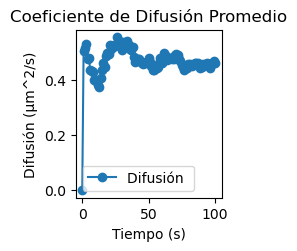

In [22]:
plt.subplot(233)
plt.plot(np.arange(num_pasos + 1) * dt, coeficiente_difusion_x, marker='o', linestyle='-', label='Difusión ')
plt.title('Coeficiente de Difusión Promedio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Difusión (µm^2/s)')
plt.legend()

In [23]:
# Crear un array para la autocorrelación de velocidades en la dirección x
autocorrelacion_velocidades_x = np.zeros(num_pasos - 1)  # Nota el ajuste del tamaño
autocorrelacion_velocidades_y = np.zeros(num_pasos - 1)

In [24]:
# Cálculo de velocidades en la dirección x
velocidades_x = np.diff(posiciones, axis=1) / dt
velocidades_y = np.diff(posiciones, axis=1) / dt

In [25]:
for tau in range(num_pasos - 1):
        # Calcula la suma de productos de velocidades con desplazamiento
        cv_x = np.mean(np.sum(velocidades_x[:, :num_pasos - tau] * velocidades_x[:, tau:], axis=1))
        autocorrelacion_velocidades_x[tau] = cv_x
        # Calcula la suma de productos de velocidades con desplazamiento en la dirección y
        cv_y = np.mean(np.sum(velocidades_y[:, :num_pasos - tau] * velocidades_y[:, tau:], axis=1))
        autocorrelacion_velocidades_y[tau] = cv_y

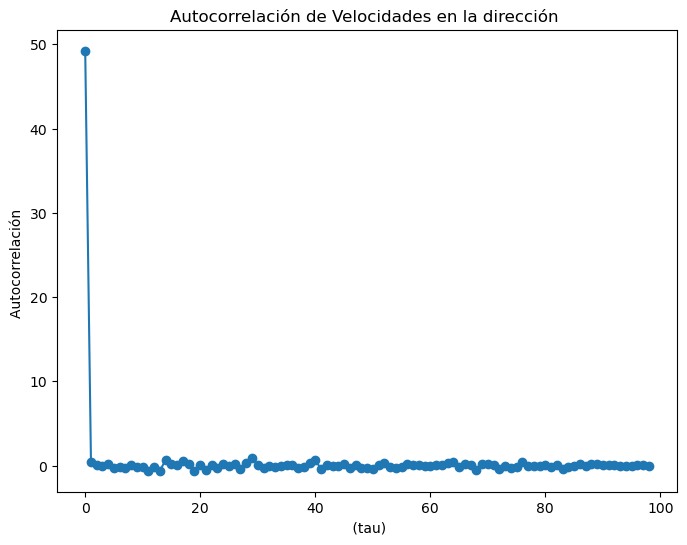

In [26]:
# Grafica la autocorrelación de velocidades en la dirección x
plt.figure(figsize=(8, 6))
plt.plot(np.arange(num_pasos - 1) * dt, autocorrelacion_velocidades_x, marker='o', linestyle='-')
plt.title('Autocorrelación de Velocidades en la dirección ')
plt.xlabel(' (tau)')
plt.ylabel('Autocorrelación ')
plt.show()